# __Supervised Learning: Multiclass Classification__

Multiclass classification is a type of classification task that involves classifying instances into one of three or more classes. Unlike binary classification, which deals with two classes, multiclass classification can handle problems where an instance can belong to multiple categories.

**Example:** A tree can be classified as a banyan tree, a palm tree, a pine tree, or an oak tree.

Some of the popular algorithms used for multi-class classification are:

- Naive Bayes
- K-Nearest Neighbors
- Decision Trees
- Random Forest

**Note:** Classification algorthims come under `discriminative algorithms`.

## __Online Gaming Behavior Dataset__

### __Dataset Description:__

The **Online Gaming Behavior** dataset on Kaggle is designed to analyze and predict players' behaviors in online gaming. It includes data on various aspects such as player identification, session duration, in-game actions, and purchases. The dataset comprises several features that capture player activities and interactions within the game environment, providing a rich source of information for developing predictive models. This data can be leveraged to understand player engagement, forecast future behavior, and tailor strategies to enhance user experience and retention.

**Number of Instances:** 40034

**Number of Attributes:** 13

**Attribute Information:**

- **PlayerID:** Unique identifier for each player.
- **Age:** Age of the player.
- **Gender:** Gender of the player.
- **Location:** Geographic location of the player.
- **GameGenre:** Genre of the game the player is engaged in.
- **PlayTimeHours:** Average hours spent playing per session.
- **InGamePurchases:** Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).
- **GameDifficulty:** Difficulty level of the game.
- **SessionsPerWeek:** Number of gaming sessions per week.
- **AvgSessionDurationMinutes:** Average duration of each gaming session in minutes.
- **PlayerLevel:** Current level of the player in the game.
- **AchievementsUnlocked:** Number of achievements unlocked by the player.

**Target Variable**
- **EngagementLevel:** Categorized engagement level reflecting player retention (Medium, High, and Low).


#### __Import the necessary libraries__

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from itertools import cycle
from sklearn.model_selection import cross_val_score

#### __Pre-processing the dataset__

In [12]:
# Load the dataset
data = pd.read_csv('datasets/online_gaming_behavior_dataset.csv')
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [13]:
data.shape

(40034, 13)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

##### __Observation:__

- There are 13 columns, out of which `Gender`, `Location`, `GameGenre` and `GameDifficulty` are categorical variables.
- `EngagementLevel` is the target variable.

In [15]:
data.describe(include='all')

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
count,40034.000000,40034.000000,40034,40034,40034,40034.000000,40034.000000,40034,40034.000000,40034.000000,40034.000000,40034.000000,40034
unique,NaN,NaN,2,4,5,NaN,NaN,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Male,USA,Sports,NaN,NaN,Easy,NaN,NaN,NaN,NaN,Medium
freq,NaN,NaN,23959,16000,8048,NaN,NaN,20015,NaN,NaN,NaN,NaN,19374
mean,29016.500000,31.992531,NaN,NaN,NaN,12.024365,0.200854,NaN,9.471774,94.792252,49.655568,24.526477,NaN
std,11556.964675,10.043227,NaN,NaN,NaN,6.914638,0.400644,NaN,5.763667,49.011375,28.588379,14.430726,NaN
min,9000.000000,15.000000,NaN,NaN,NaN,0.000115,0.000000,NaN,0.000000,10.000000,1.000000,0.000000,NaN
25%,19008.250000,23.000000,NaN,NaN,NaN,6.067501,0.000000,NaN,4.000000,52.000000,25.000000,12.000000,NaN
50%,29016.500000,32.000000,NaN,NaN,NaN,12.008002,0.000000,NaN,9.000000,95.000000,49.000000,25.000000,NaN
75%,39024.750000,41.000000,NaN,NaN,NaN,17.963831,0.000000,NaN,14.000000,137.000000,74.000000,37.000000,NaN


#### __Inspecting the data__

In [16]:
# Checking for missing values
data.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [17]:
# Checking for duplicate values
data.duplicated().sum()

0

In [18]:
# Distribution of the target variable
data['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [19]:
data_df = data.copy()

In [21]:
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


#### __Convert Categorical variables__

In [22]:
# Convert categorical string variables to numerical values
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']
label_encoders = {}
for col in categorical_columns:
    label_encoder = LabelEncoder()
    data_df[col] = label_encoder.fit_transform(data_df[col])
    label_encoders[col] = label_encoder

label_encoders

{'Gender': LabelEncoder(),
 'Location': LabelEncoder(),
 'GameGenre': LabelEncoder(),
 'GameDifficulty': LabelEncoder()}

In [23]:
data_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,2,4,16.271119,0,2,6,108,79,25,Medium
1,9001,29,0,3,4,5.525961,0,2,5,144,11,10,Medium
2,9002,22,0,3,3,8.223755,0,0,16,142,35,41,High
3,9003,35,1,3,0,5.265351,1,0,9,85,57,47,Medium
4,9004,33,1,1,0,15.531945,0,2,2,131,95,37,Medium


#### __Perform train-test split__

In [31]:
target_column = 'EngagementLevel'

X = data_df.drop(columns=[target_column])
y = data_df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [32]:
X.shape

(40034, 12)

#### __Plot a correlation heatmap to understand the relationship between features__

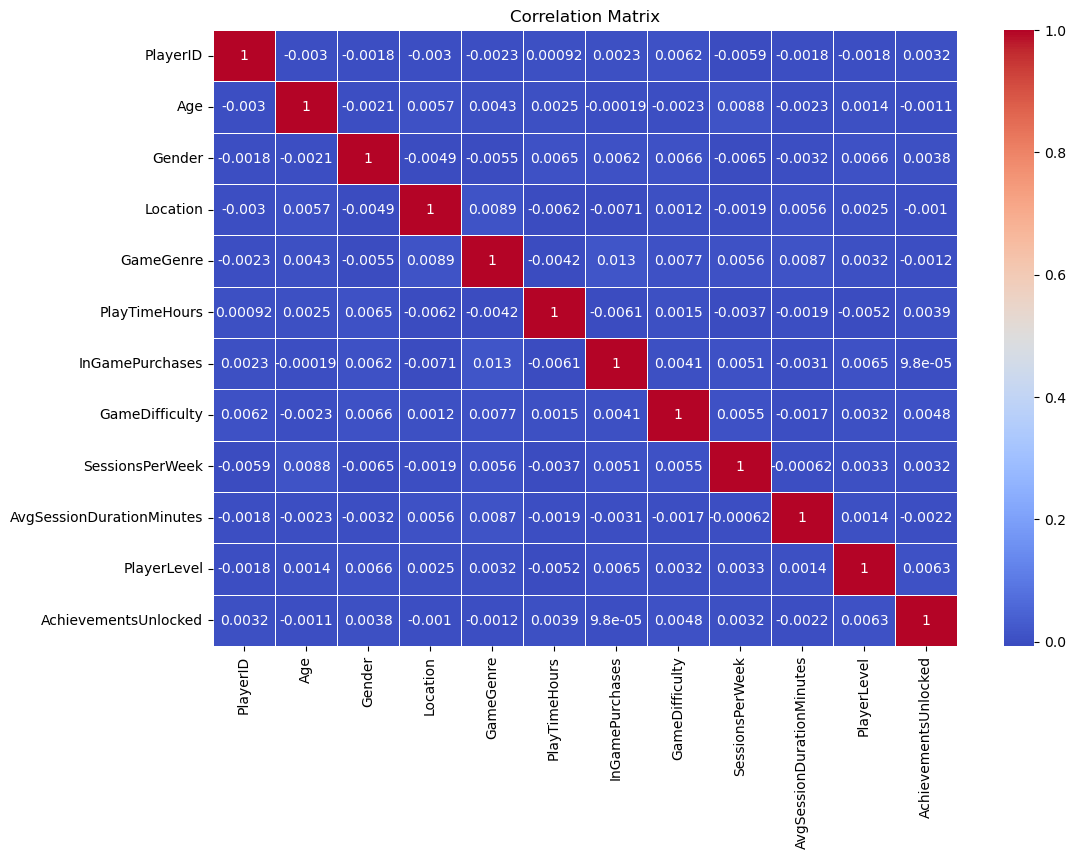

In [33]:
# Heatmap of the correlation matrix using seaborn library
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### __Naive Bayes Classifier - Online Gaming Behavior dataset__

In [51]:
# Define the pipeline
pipeline_nb = Pipeline([
    ('scalar', StandardScaler()),
    ('nb', GaussianNB())
])
pipeline_nb.fit(X_train, y_train)

# Predict on training and testing set
y_pred_train_nb = pipeline_nb.predict(X_train)
y_pred_test_nb = pipeline_nb.predict(X_test)
y_pred_test_prob_nb = pipeline_nb.predict_proba(X_test)

# Determine the class order
class_order_nb = pipeline_nb.classes_
print("Class order (NB):", class_order_nb)

Class order (NB): ['High' 'Low' 'Medium']


In [37]:
# Create a DataFrame to display actual and predicted labels with probabilities
results_df_nb = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_nb,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order_nb):
    results_df_nb[f'Predicted Probability - {class_name}'] = np.round(y_pred_test_prob_nb[:, i], 2)

# Display the first few rows of the results DataFrame
results_df_nb.head()

,Actual Label,Predicted Label,Predicted Probability - High,Predicted Probability - Low,Predicted Probability - Medium
34667,Medium,Medium,0.22,0.07,0.71
22227,Medium,Medium,0.19,0.17,0.64
24899,Medium,Medium,0.01,0.34,0.65
35415,Medium,Medium,0.22,0.16,0.62
21440,Medium,Medium,0.34,0.13,0.53


In [38]:
pipeline_nb.score(X_test, y_test)

0.8434494817035094

In [40]:
print("Naive Bayes Classifier:")
training_accuracy =  accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Naive Bayes Classifier:
Training Accuracy: 0.8447960033305578
Testing Accuracy: 0.8434494817035094


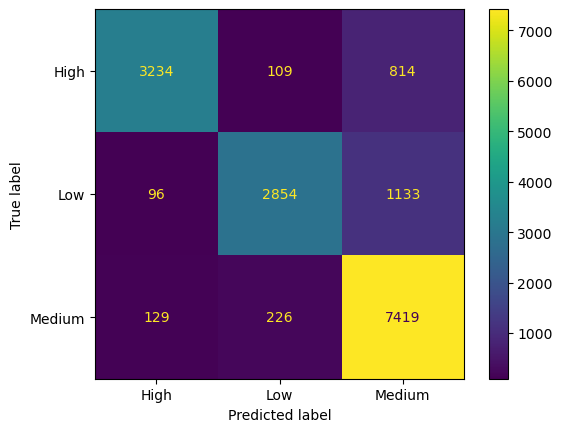

In [42]:
# Generate the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_test_nb, labels=class_order_nb)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb,display_labels=class_order_nb)

# display matrix
cm_display.plot()
plt.show()

##### __Observation:__

The confusion matrix is a 3x3 matrix because it is a multiclass classification problem with three classes (Medium, High, Low).

- **High:** This class has a relatively high number of true positives (3234), but also a considerable number of false negatives, indicating that some instances misclassified as Low and medium
- **Low:** This class has a moderate number of true positives (2854), but a higher number of false negatives, indicating frequent misclassification of `low` instances as `high` or `medium`.
- **Medium:** This class has a very high number of true positives (7419), indicating the model is very good at correctly identifying `medium` instances.

In [44]:
print(classification_report(y_test, y_pred_test_nb, target_names=class_order_nb))

              precision    recall  f1-score   support

        High       0.93      0.78      0.85      4157
         Low       0.89      0.70      0.78      4083
      Medium       0.79      0.95      0.87      7774

    accuracy                           0.84     16014
   macro avg       0.87      0.81      0.83     16014
weighted avg       0.86      0.84      0.84     16014



#### __Plotting ROC-AUC curve for Multiclassification problems:__

- `label_binarize` is a function from Scikit-Learn that is used to convert class labels into a binary format suitable for certain types of classifiers and evaluation metrics.
- This is particularly useful when you need to handle multiclass problems with methods that are inherently designed for binary classification, such as calculating ROC curves and AUC scores.

In [45]:
set(y_test)

{'High', 'Low', 'Medium'}

In [48]:
label_binarize(y_test, classes=pipeline_nb.classes_)

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

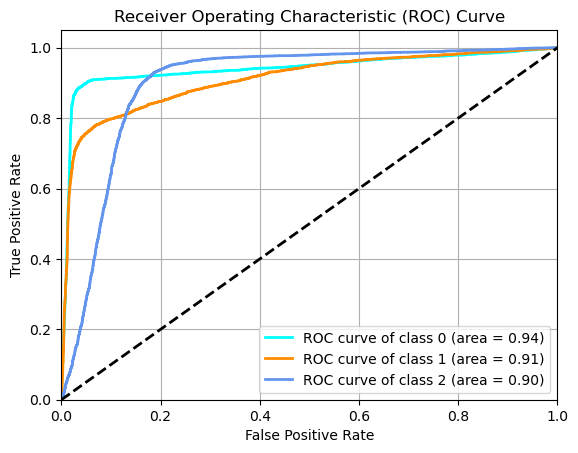

In [50]:
# Check if more than one class is present in y_test
if len(set(y_test)) > 1:
    # Plot ROC curve
    y_test_binarized = label_binarize(y_test, classes=pipeline_nb.classes_)
    n_classes = y_test_binarized.shape[1]

    y_score = pipeline_nb.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

    # Plotting the ROC curves
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("ROC AUC score is not defined as only one class is present in y_true.")

##### __Observation__

- __Class 0/High__: The model performs very well in classifying instances of Class 0. An AUC of 0.94 indicates that there is a 94% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance for Class 0.
- __Class 1/Low:__ The model has excellent performance for Class 1, with an AUC of 0.91. This means the model has a 91% chance of correctly distinguishing between a positive instance and a negative instance for Class 1.
- __Class 2/Medium:__ The model performs very well for Class 2, with an AUC of 0.90. This indicates a 90% chance of the model correctly distinguishing between a positive instance and a negative instance for Class 2.
- __Diagonal Line (Black dashed line):__ The diagonal line represents random guessing, with an AUC of 0.5. Any ROC curve below this line indicates worse than random performance, while curves above this line indicate better than random performance.

##### **Key Observations:**

- The Naive Bayes performs exceptionally well for all classes, with AUC values ranging from 0.90 to 0.94. The model is best at classifying instances of Class 0, followed closely by Class 1, and then Class 2.


### __K-Nearest Neighbors (KNN) - Online Gaming Behavior Dataset__

In [57]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),                # Standardize the data
    ('knn', KNeighborsClassifier(n_neighbors=3)) # KNN classifier
])

# knn_model = KNeighborsClassifier(n_neighbors=3)
pipeline_knn.fit(X_train, y_train)

# Predict on testing set
y_pred_test_knn = pipeline_knn.predict(X_test)
y_pred_test_prob_knn = pipeline_knn.predict_proba(X_test)

# Determine the class order
class_order_knn = pipeline_knn.classes_
print("Class order (KNN):", class_order_knn)

Class order (KNN): ['High' 'Low' 'Medium']


In [58]:
# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_knn,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order_knn):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_test_prob_knn[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.00,0.00,1.00
22227,Medium,High,0.67,0.00,0.33
24899,Medium,Low,0.00,0.67,0.33
35415,Medium,Medium,0.33,0.00,0.67
21440,Medium,Medium,0.33,0.00,0.67


In [56]:
# Calculate training and testing accuracy
print("K-Nearest Neighbors Classification:")
training_accuracy =  accuracy_score(y_train, pipeline_knn.predict(X_train))
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

K-Nearest Neighbors Classification:
Training Accuracy: 0.8572855953372189
Testing Accuracy: 0.7141875858623704


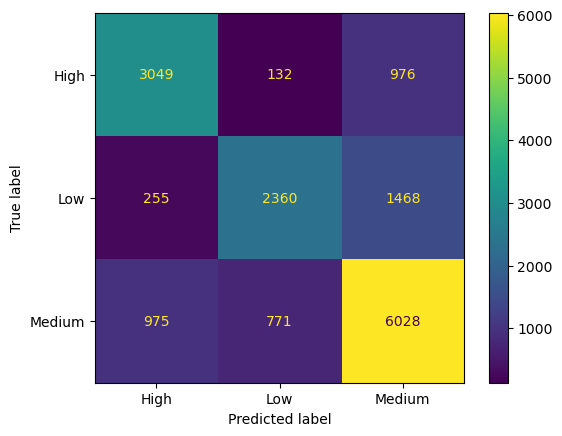

In [59]:
# Generate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn, labels=class_order_knn)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=class_order_knn)

# display matrix
cm_display.plot()
plt.show()

##### __Observation__

- **High:** This class has a moderate number of true positives (3049), but also a significant number of false negatives, indicating that many `high` instances are misclassified as `medium` or `low`.
- **Low:** This class has a lower number of true positives (2360) and a high number of false negatives, indicating frequent misclassification of `Low` instances as `medium` or `high`.
- **Medium:** This class has a high number of true positives (6028), indicating the model is relatively good at identifying `Medium` instances. However, there is still a considerable number of false negatives.

In [60]:
print(classification_report(y_test, y_pred_test_knn, target_names=class_order_knn))

              precision    recall  f1-score   support

        High       0.71      0.73      0.72      4157
         Low       0.72      0.58      0.64      4083
      Medium       0.71      0.78      0.74      7774

    accuracy                           0.71     16014
   macro avg       0.72      0.70      0.70     16014
weighted avg       0.71      0.71      0.71     16014



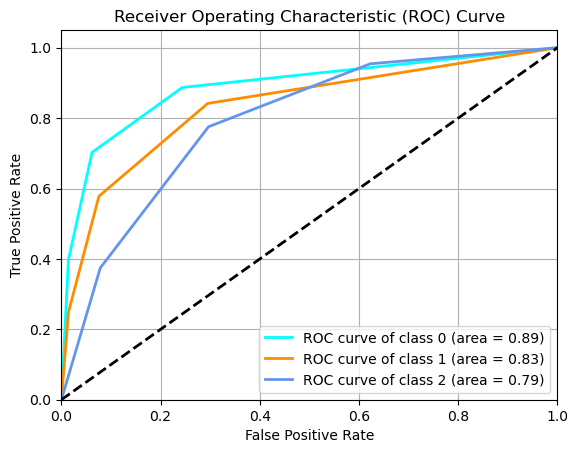

In [62]:
# Check if more than one class is present in y_test
if len(set(y_test)) > 1:
    # Plot ROC curve
    y_test_binarized = label_binarize(y_test, classes=pipeline_knn.classes_)
    n_classes = y_test_binarized.shape[1]

    y_score = pipeline_knn.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

    # Plotting the ROC curves
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("ROC AUC score is not defined as only one class is present in y_true.")

##### __Observation__

- **Class 0 (Cyan Line):** `AUC: 0.89` - The model performs well in classifying instances of Class 0/Medium. An AUC of 0.89 indicates that there is an 89% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance for Class 0.
- **Class 1 (Orange Line):** `AUC: 0.83` - The model has good performance for Class 1, with an AUC of 0.83. This means the model has an 83% chance of correctly distinguishing between a positive instance and a negative instance for Class 1.
- **Class 2 (Blue Line):** `AUC: 0.79` - The model performs moderately well for Class 2, with an AUC of 0.79. This indicates a 79% chance of the model correctly distinguishing between a positive instance and a negative instance for Class 2.

##### **Key Observation:**

- The KNN classifier performs reasonably well for all classes, with AUC values ranging from 0.79 to 0.89.
- If the dataset has imbalanced classes (i.e., some classes have significantly more instances than others), this could affect the performance of the model and the ROC curves. It's essential to consider class distribution when interpreting these results.

### __Decision Tree classifier - Online Gaming Behavior Dataset__

In [65]:
pipeline_dtc = Pipeline([
    ('scaler', StandardScaler()),    # Standardize the data
    ('dt', DecisionTreeClassifier(random_state=42)) # Decision Tree classifier
])

pipeline_dtc.fit(X_train, y_train)

# Predict on testing set
y_pred_test_dt = pipeline_dtc.predict(X_test)
y_pred_test_prob_dt = pipeline_dtc.predict_proba(X_test)

# Determine the class order
class_order_dt = pipeline_dtc.classes_
print("Class order (DT):", class_order_dt)

Class order (DT): ['High' 'Low' 'Medium']


In [66]:
# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_dt,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order_dt):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_test_prob_dt[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.0,0.0,1.0
22227,Medium,Medium,0.0,0.0,1.0
24899,Medium,High,1.0,0.0,0.0
35415,Medium,Medium,0.0,0.0,1.0
21440,Medium,Medium,0.0,0.0,1.0


In [67]:
## Calculate training and testing accuracy
print("Decision Tree Classifier:")
training_accuracy =  accuracy_score(y_train, pipeline_dtc.predict(X_train))
testing_accuracy = accuracy_score(y_test, y_pred_test_dt)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Decision Tree Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8285250405894842


##### __Observation__

- The high training accuracy combined with the slightly lower testing accuracy typically points towards an overfitting scenario.
- In practice, this might mean that the decision tree has complex branches that perfectly classify the training data but slightly miss when predicting new, unseen data.
- Adjustments such as pruning the tree, setting a maximum depth, or increasing the minimum samples required for a node split might help in reducing overfitting and improving the model's generalization.
- Decision trees are prone to overfitting, especially with complex datasets having many features and deep trees. -
- Cross-validation helps in checking whether the model just memorizes the training data or if it generalizes well over unseen data.

#### __Using cross_val_score with the pipeline and training data__

In [71]:
scores = cross_val_score(pipeline_dtc, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.83243131 0.82618651 0.83617818 0.82597835 0.82327227]
Mean cross-validation score: 0.8288093255620316


##### **Observation:**

- Cross-validation scores vary slightly but generally remain high, with a mean cross-validation score of 0.82. This indicates good model performance and stability.

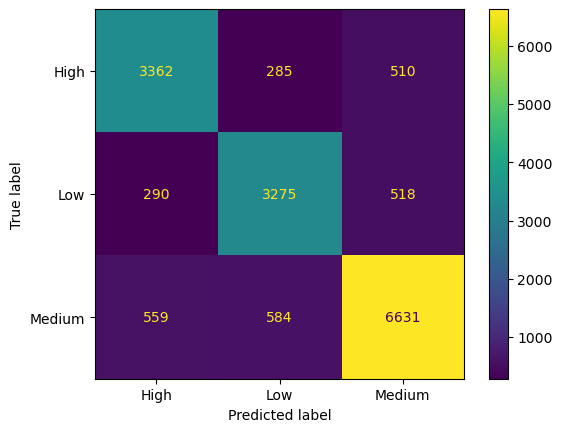

In [74]:
# Generate the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_test_dt, labels=class_order_dt)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=class_order_dt)

# display matrix
cm_display.plot()
plt.show()

In [76]:
print(classification_report(y_test, y_pred_test_dt, target_names=class_order_dt))

              precision    recall  f1-score   support

        High       0.80      0.81      0.80      4157
         Low       0.79      0.80      0.80      4083
      Medium       0.87      0.85      0.86      7774

    accuracy                           0.83     16014
   macro avg       0.82      0.82      0.82     16014
weighted avg       0.83      0.83      0.83     16014



### __Random Forest Classifier - Online Gaming Behavior Dataset__

In [77]:
# Train Random Forest
pipeline_rfc = Pipeline([
    ('scaler', StandardScaler()),     # Standardize the data
    ('clf', RandomForestClassifier(random_state=42)) # Random Forest classifier
])

pipeline_rfc.fit(X_train, y_train)

# Predict on testing set
y_pred_test_rfc = pipeline_rfc.predict(X_test)
y_pred_test_prob_rfc = pipeline_rfc.predict_proba(X_test)

# Determine the class order
class_order_rfc = pipeline_rfc.classes_
print("Class order (RFC):", class_order_rfc)

Class order (RFC): ['High' 'Low' 'Medium']


In [78]:
# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_rfc,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order_rfc):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_test_prob_rfc[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.07,0.05,0.88
22227,Medium,Medium,0.08,0.04,0.88
24899,Medium,Low,0.05,0.80,0.15
35415,Medium,Medium,0.11,0.08,0.81
21440,Medium,Medium,0.21,0.06,0.73


In [79]:
# Calculate training and testing accuracy
training_accuracy =  accuracy_score(y_train, pipeline_rfc.predict(X_train))
testing_accuracy = accuracy_score(y_test, y_pred_test_rfc)

print("Random Forest Classification:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.909891345073061


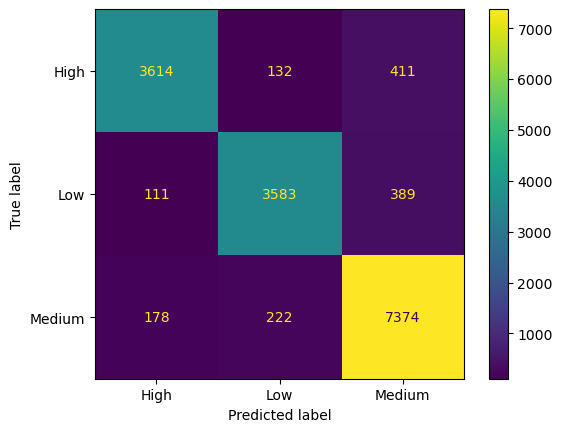

In [80]:
# Generate the confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, y_pred_test_rfc, labels=class_order_rfc)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc, display_labels=class_order_rfc)

# display matrix
cm_display.plot()
plt.show()

In [81]:
print(classification_report(y_test, y_pred_test_rfc, target_names=class_order_rfc))

              precision    recall  f1-score   support

        High       0.93      0.87      0.90      4157
         Low       0.91      0.88      0.89      4083
      Medium       0.90      0.95      0.92      7774

    accuracy                           0.91     16014
   macro avg       0.91      0.90      0.91     16014
weighted avg       0.91      0.91      0.91     16014



##### __Observation:__

- The Random Forest model shows perfect accuracy on both the training and testing sets, indicating that it has classified all instances correctly.
- The confusion matrix for the Random Forest model shows perfect classification for all classes, with less misclassifications. The Decision Tree had a few misclassifications, particularly one misclassified instance in Medium and Low.
- Given the perfect performance of the Random Forest model on this dataset, further hyperparameter tuning might not be necessary. However, for more complex datasets, hyperparameter tuning could further optimize the model's performance.

## __Multi-Label Classification__

It allows us to classify datasets with more than one target variable. There are several labels for the outputs of a given prediction, and when making predictions, a given input may belong to more than one label.





### __Examples__

#### __1. Text Categorization__

**Example:** News Article Classification

**Scenario:** A news article might belong to multiple categories such as politics, economy, and health.

**Implementation:** Using multilabel classification, the classifier can assign multiple labels to each news article indicating the categories it belongs to.

#### __2. Image Tagging__

**Example:** Automatic Tagging of Images on Social Media

**Scenario:** An image can contain multiple objects such as people, cars, trees, etc.

**Implementation:** A multilabel classifier can predict all the objects present in an image, thus tagging it with multiple labels.

#### __3. Medical Diagnosis__

**Example:** Predicting Multiple Diseases

**Scenario:** A patient might have multiple co-existing conditions, such as diabetes, hypertension, and heart disease.

**Implementation:** A multilabel classifier can be trained to predict all the diseases a patient might have based on their medical records and test results.


#### __4. Music Genre Classification__

**Example:** Categorizing Songs by Genres

**Scenario:** A single song might belong to multiple genres such as rock, blues, and jazz.

**Implementation:** Using multilabel classification, the classifier can tag each song with all relevant genres.

#### __5. Tagging Questions in Q&A Platforms__

**Example:** Tagging Questions on Stack Overflow

**Scenario:** A single question might relate to multiple topics such as Python, data science, and machine learning.

**Implementation:** A multilabel classifier can automatically assign all relevant tags to each question posted on the platform.

### __Algorithms for Multi-Label Classification__

#### __1. Binary Relevance (BR):__

**Concept:** In BR, we treat each label independently and train a separate binary classifier for each label.

**Algorithm:**
- For each label ($L_i$), create a new binary classification problem.
- Train a binary classifier on the original features to predict whether ($L_i$) is present or not.
- Combine the predictions from all binary classifiers to form the final multilabel prediction.

Below are the popular classifiers under it:

- Logistic Regression (BR)
- Naive Bayes (BR)
- Decision Tree Classifier (BR)
- Random Forest Classifier (BR)
- Support Vector Machine (SVM) (BR)
- OneVsRestClassifier (OvR): The OneVsRestClassifier, also known as One-vs-All, works by training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This method involves training as many classifiers as there are classes in the dataset. Each classifier is responsible for deciding whether an instance belongs to its corresponding class or not.

#### __2. Classifier Chains (CC):__

**Concept:** CC models label dependencies by chaining classifiers.

**Algorithm:**

- Order the labels in a chain (randomly or based on some heuristic).
- Train the first binary classifier on the original features.
- For subsequent labels, include the predictions of previous classifiers as additional features.
- Continue this process through the chain of classifiers.
- Combine the predictions from all classifiers to form the final multilabel prediction.

Below are the popular classifiers under it:

- Logistic Regression (LP)
- Naive Bayes (LP)
- Decision Tree Classifier (LP)
- Random Forest Classifier (LP)
- Support Vector Machine (SVM) (LP)

#### __3. Label Powerset (LP):__

**Concept:** LP transforms the multilabel problem into a single multiclass problem by considering each unique set of labels as a single class.

**Algorithm:**

- Create a new target variable where each unique combination of labels is treated as a separate class.
- Train a single multiclass classifier on the original features to predict this new target variable.
- Convert the multiclass predictions back to multilabel format

Below are the popular classifiers under it:

- Logistic Regression (LP)
- Naive Bayes (LP)
- Decision Tree Classifier (LP)
- Random Forest Classifier (LP)
- Support Vector Machine (SVM) (LP)

#### __4. Ensemble Methods:__

**Concept:** Ensemble methods combine predictions from multiple base models to improve performance.

**Algorithm:**

- Train multiple multilabel classifiers (e.g., using BR, CC, or LP).
- Combine their predictions using techniques like majority voting, weighted averaging, or stacking.

Below are the popular classifiers under it:

- Ensemble of Binary Relevance
- Ensemble of Classifier Chains
- RandomKLabelsets (RAkEL)

### __Challenges in Multi-Label Classification:__

Multilabel classification, while a powerful technique, is less commonly used compared to other types of classification for several reasons. Here are some key points to substantiate this:


#### __Complexity and Computation:__

- **Algorithmic Complexity:** Multilabel classification algorithms are inherently more complex than binary or multiclass classification algorithms. They need to handle multiple labels simultaneously, which can lead to higher computational costs and longer training times.
- **Computational Resources:** Multilabel classification often requires more computational resources, including memory and processing power. This can be a limiting factor, especially for large datasets or when deploying models in resource-constrained environments.

#### __Data Challenges:__

- **Label Correlation:** Handling correlations between labels adds another layer of complexity. Many traditional classification algorithms are not designed to capture and leverage these correlations effectively.
- **Sparse Labels:** In many practical scenarios, multilabel datasets are sparse, meaning that most instances are only associated with a few of the possible labels. This sparsity can make it difficult for algorithms to learn effectively.

#### __Evaluation and Interpretation:__

- **Evaluation Metrics:** Evaluating multilabel classifiers is more complex because traditional metrics like accuracy don't capture the nuances of multilabel predictions. Metrics like Hamming Loss, F1-score, and others need to be carefully chosen and interpreted.
- **Interpretability:** Models in multilabel classification can be harder to interpret. Understanding why a model made certain predictions for multiple labels simultaneously can be challenging, making it difficult to trust and act upon the model's output.

#### __Practical and Application-Specific Issues:__

- **Limited Applications:** There are fewer applications that inherently require multilabel classification. Many real-world problems can be adequately addressed with binary or multiclass classification, reducing the demand for multilabel techniques.
- **Data Availability:** Multilabel datasets are less common compared to binary or multiclass datasets. This scarcity makes it harder for practitioners to find appropriate data to train and evaluate their models.

#### __Software and Tooling:__

- **Tooling and Libraries:** Although libraries like scikit-learn and scikit-multilearn provide support for multilabel classification, the ecosystem is not as mature as for binary or multiclass classification. Fewer pre-built tools, frameworks, and resources are available, which can discourage adoption.

Below are additional resources/research papers to learn more about Multi-label classification:
 1. [Deep Learning for Multi-Label Learning: A Comprehensive Survey](https://arxiv.org/abs/2401.16549)
 2. [Comprehensive Comparative Study of Multi-Label Classification Methods](https://arxiv.org/abs/2102.07113)
 3. [MlTr: Multi-label Classification with Transformer](https://arxiv.org/abs/2106.06195)
